1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

Model: Linear Regression
MSE: 26.128061814755068
R-squared: 0.6437104334623829


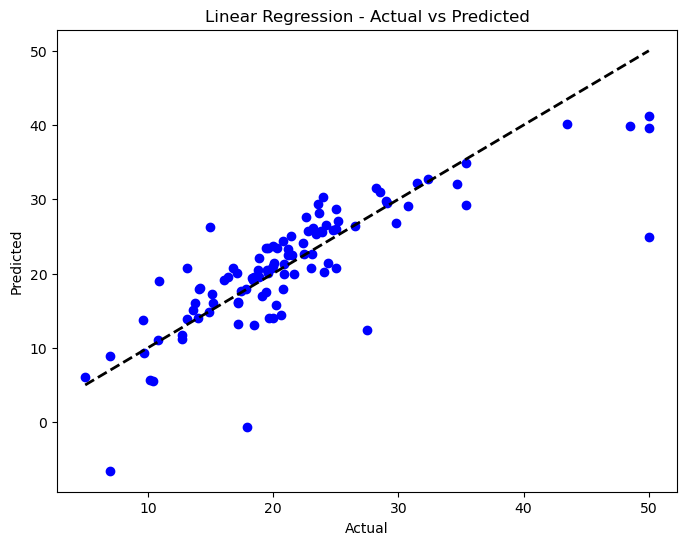

Model: Random Forest
MSE: 8.174720147058826
R-squared: 0.8885272272236769


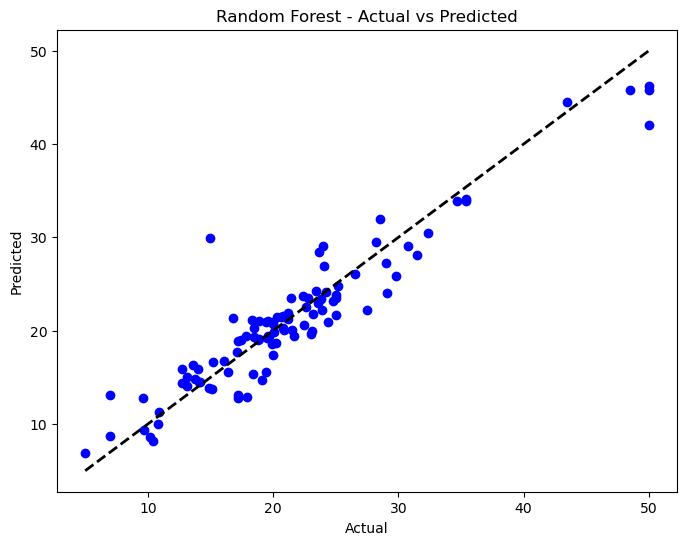

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('data.csv')

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Prepare data
X = df_imputed.drop(['MEDV','ZN','CHAS'], axis=1)
y = df_imputed['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")

    # Visualize actual vs predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()


RMSE: 43.83957477390344


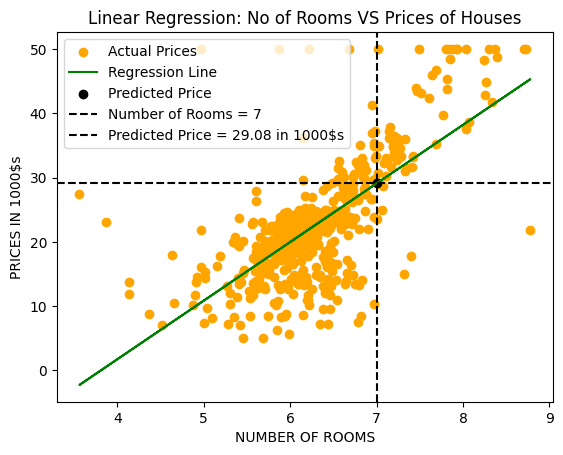

Predicted Price for House with 7 rooms: 29.08 in 1000$s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# THIS IS AN EXAMPLE OF A LINEAR REGRESSION ALGORITHM OF A HOUSE PRICE PREDICTION MODEL USING THE ATTRIBUTE - NUMBER OF ROOMS IN A HOUSE
# Importing pandas and numpy libraries
import pandas as pd
import numpy as np

# Importing different modules from sklearn library and matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Now we have to read the csv file using read_csv function
df = pd.read_csv('data.csv')
model = LinearRegression()

# Now for little preprocessing, we will drop the null values from the dataset
df = df.dropna()

# It's time to fit the target variable and its dependent variable which in this case is RM.
model.fit(df[['RM']], df[['MEDV']])
predictions = model.predict(df[['RM']])

# Now we will calculate the root mean squared error
rmse = mean_squared_error(df['MEDV'], predictions)
print('RMSE:', rmse)

# Now we have to plot these using the matplotlib library and pyplot module, and we will be using a scatter plot
plt.scatter(df['RM'], df['MEDV'], color='orange', label='Actual Prices')
plt.plot(df['RM'], predictions, color='green', label='Regression Line')
plt.xlabel('NUMBER OF ROOMS')
plt.ylabel('PRICES IN 1000$s')
plt.title('Linear Regression: No of Rooms VS Prices of Houses')

# Plotting the predicted price for a house with new_rooms
plt.scatter(new_rooms, predicted_price, color='black', marker='o', label='Predicted Price')
plt.axvline(x=new_rooms, color='black', linestyle='--', label=f'Number of Rooms = {new_rooms}')
plt.axhline(y=predicted_price.item(), color='black', linestyle='--', label=f'Predicted Price = {predicted_price.item():.2f} in 1000$s')
plt.legend()
plt.show()

# Now our model is trained using linear regression. It's time to test it so we will take the number of rooms as input and the price will be predicted as output
new_rooms = 7

# Now we apply our model on this input to calculate the price of the house!
predicted_price = model.predict([[new_rooms]])
print(f'Predicted Price for House with {new_rooms} rooms: {predicted_price.item():.2f} in 1000$s')
